In [135]:
import pandas as pd
import matplotlib.pyplot as plt

In [136]:
df = pd.read_excel('Data/USDB_1972_2023_ohneSchadenszahlen_ohneBeschriebe_original.xlsx')
df['month'] = df['Datum'].dt.to_period('M')
df['damage'] = df['Schadensausmass, gering [0.01-0.4], mittel [0.4-2], gross/katastrophal[>2] oder Todesfall [Mio. CHF]']
df['Canton'] = df['Kanton'].str[:2]
df.drop(columns='Kanton')
df.drop(columns='Schadensausmass, gering [0.01-0.4], mittel [0.4-2], gross/katastrophal[>2] oder Todesfall [Mio. CHF]')

,Gemeinde,Gemeindenummer,Weitere Gemeinde,Kanton,Prozessraum,MAXO Datum,Datum,MAXO Zeit,Zeit,Gewässer,...,Dauerregen Niederschlagsmenge MAXO,Dauerregen Niederschlagsmenge [mm],Schneeschmelze MAXO,Schneeschmelze,Ursache nicht bestimmbar MAXO,Ursache nicht bestimmbar,ID,month,damage,Canton
0,Rossinière,5842,NaN,VD_x001D_,Pont du Lanciau,A,1972-02-17,A,01:00:00,NaN,...,NaN,NaN,NaN,NaN,M,1.0,37955,1972-02,gering,VD
1,Sonvilier,445,NaN,BE_x001D_,NaN,A,1972-03-09,A,01:00:00,NaN,...,NaN,NaN,NaN,NaN,M,1.0,37619,1972-03,gering,BE
2,Ormont-Dessous,5410,NaN,VD_x001D_,NaN,M,1972-04-08,M,20:30:00,NaN,...,NaN,NaN,NaN,NaN,M,1.0,37956,1972-04,gering,VD
3,Einsiedeln,1301,NaN,SZ_x001D_,Miesegg,A,1972-05-01,O,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10498,1972-05,gering,SZ
4,Nendaz,6024,NaN,VS_x001D_,Les Follards,M,1972-06-16,O,NaN,NaN,...,NaN,NaN,NaN,NaN,M,1.0,37600,1972-06,gering,VS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28510,Innerthal,1343,NaN,SZ_x001D_,Gugelberg,A,2023-12-17,A,01:30:00,NaN,...,O,NaN,NaN,NaN,NaN,NaN,39138,2023-12,gering,SZ
28511,Belp,861,Toffen,BE_x001D_,NaN,M,2023-12-18,NaN,NaN,NaN,...,O,NaN,M,1.0,NaN,NaN,39159,2023-12,gering,BE
28512,Toffen,884,NaN,BE_x001D_,Breitlohn,M,2023-12-19,M,14:30:00,NaN,...,O,NaN,NaN,NaN,NaN,NaN,39157,2023-12,gering,BE
28513,Zollikon,161,NaN,ZH_x001D_,Trichtenhausen,M,2023-12-22,NaN,NaN,NaN,...,O,NaN,NaN,NaN,NaN,NaN,39201,2023-12,gering,ZH


In [140]:
df['Hauptprozess Wasser/Murgang Unterteilung'].unique()

array([nan, 'Ueberschwemmung/Hochwasser', 'Murgang (in Gerinne)'],
      dtype=object)

In [137]:
df['month-only'] = df['month'].dt.month

In [73]:
counts_month_year = df.groupby('month').size()
counts_only_month = df.groupby('month-only').size()
counts_only_month_from_2010 = df.where(df['Datum'] >'2020-01-01').groupby('month').size()
counts_year_damage = df.groupby(['month-only', 'damage']).size().unstack(fill_value=0)
counts_canton = df.groupby('Kanton').size()

In [51]:
ZH =1728.94
BE

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x136ef1550>>

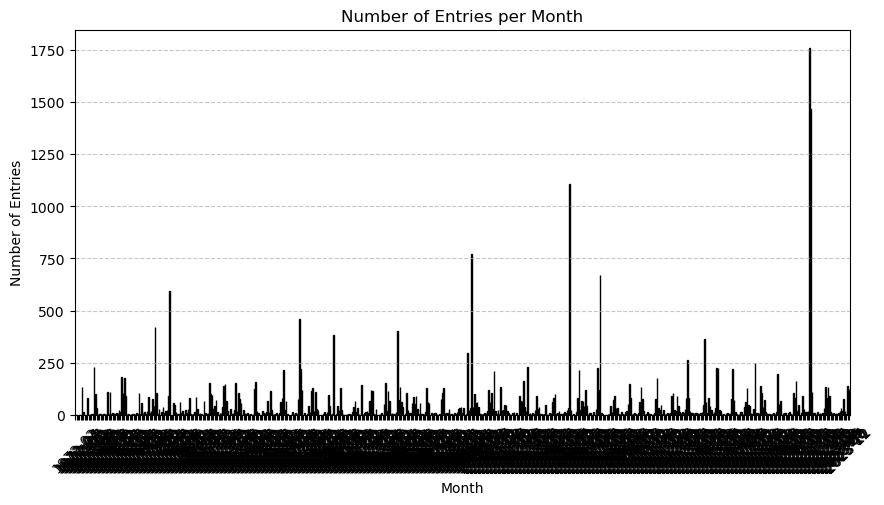

In [40]:
plt.figure(figsize=(10, 5))
counts_month_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

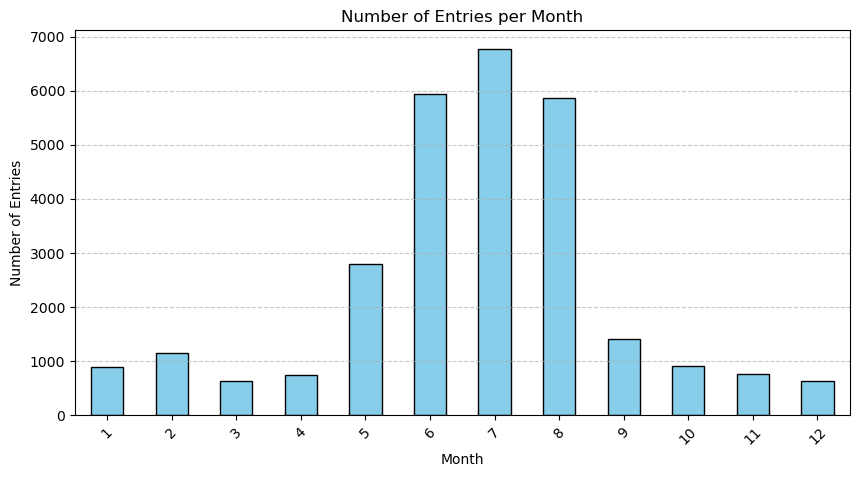

In [41]:
plt.figure(figsize=(10, 5))
counts_only_month.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

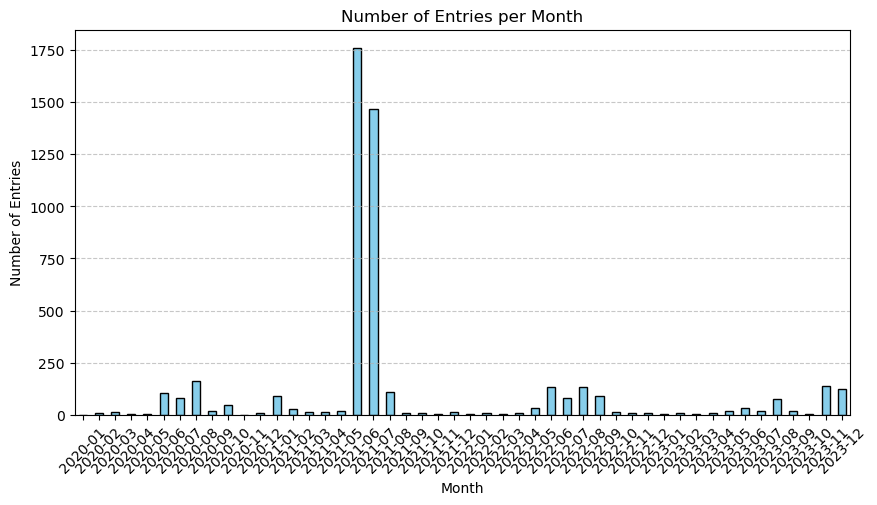

In [48]:
plt.figure(figsize=(10, 5))
counts_only_month_from_2010.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Month')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Figure size 1000x500 with 0 Axes>

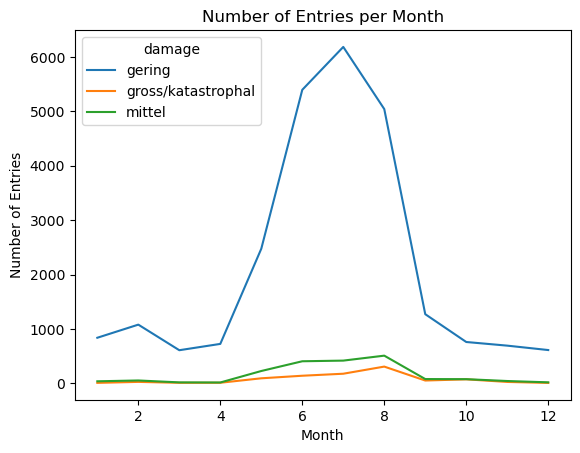

In [66]:
plt.figure(figsize=(10, 5))
counts_year_damage.plot()
plt.xlabel('Month')
plt.ylabel('Number of Entries')
plt.title('Number of Entries per Month')
plt.show()

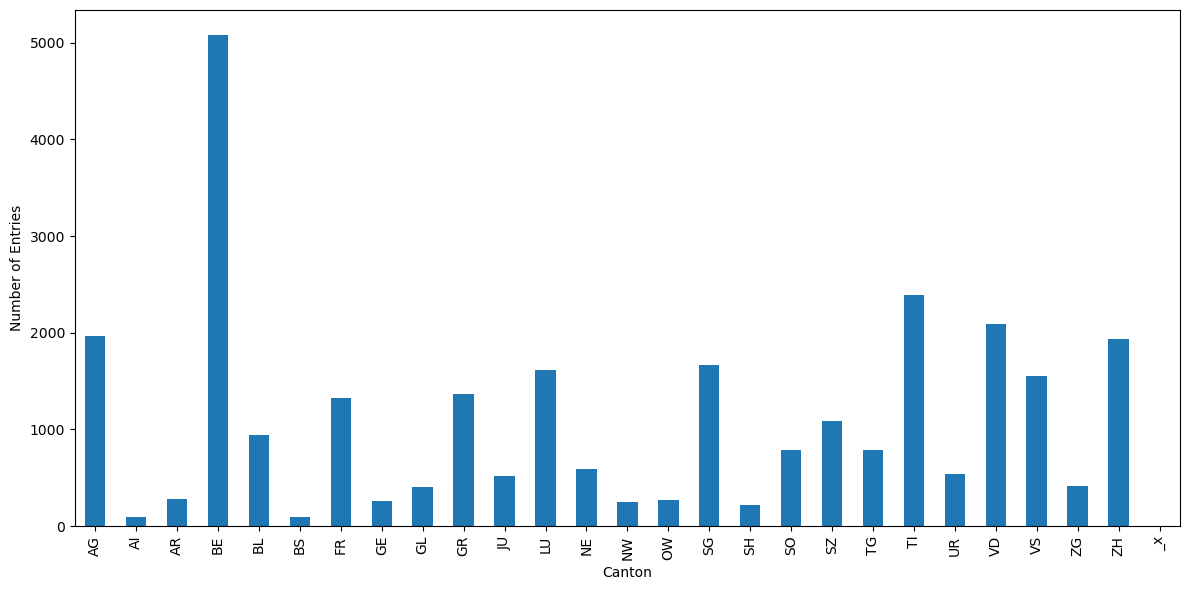

In [76]:
plt.figure(figsize=(12, 6))

# Plot the data
counts_canton.plot(kind='bar')

# Labeling the x-axis and y-axis
plt.xlabel('Canton')
plt.ylabel('Number of Entries')

# Set the x-ticks to show all canton names explicitly
plt.xticks(ticks=range(len(counts_canton)), labels=counts_canton.index, rotation=90, ha='center')

# Adjust layout for better fit
plt.tight_layout()

# Show the plot
plt.show()

In [112]:
df_size = pd.read_csv('../Data/data_analysis/canton_size.csv')

In [113]:
df = pd.merge(df, df_size, on='Canton', how='inner')

In [114]:
df

,Gemeinde,Gemeindenummer,Weitere Gemeinde,Kanton,Prozessraum,MAXO Datum,Datum,MAXO Zeit,Zeit,Gewässer,...,Ursache nicht bestimmbar MAXO,Ursache nicht bestimmbar,ID,month,damage,Canton,Size_x,Size_y,Size,Size_Canton
0,Rossinière,5842,NaN,VD_x001D_,Pont du Lanciau,A,1972-02-17,A,01:00:00,NaN,...,M,1.0,37955,1972-02,gering,VD,3212.02,3212.02,3212.02,3212.02
1,Sonvilier,445,NaN,BE_x001D_,NaN,A,1972-03-09,A,01:00:00,NaN,...,M,1.0,37619,1972-03,gering,BE,5958.50,5958.50,5958.50,5958.50
2,Ormont-Dessous,5410,NaN,VD_x001D_,NaN,M,1972-04-08,M,20:30:00,NaN,...,M,1.0,37956,1972-04,gering,VD,3212.02,3212.02,3212.02,3212.02
3,Einsiedeln,1301,NaN,SZ_x001D_,Miesegg,A,1972-05-01,O,NaN,NaN,...,NaN,NaN,10498,1972-05,gering,SZ,907.88,907.88,907.88,907.88
4,Nendaz,6024,NaN,VS_x001D_,Les Follards,M,1972-06-16,O,NaN,NaN,...,M,1.0,37600,1972-06,gering,VS,5224.64,5224.64,5224.64,5224.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28507,Innerthal,1343,NaN,SZ_x001D_,Gugelberg,A,2023-12-17,A,01:30:00,NaN,...,NaN,NaN,39138,2023-12,gering,SZ,907.88,907.88,907.88,907.88
28508,Belp,861,Toffen,BE_x001D_,NaN,M,2023-12-18,NaN,NaN,NaN,...,NaN,NaN,39159,2023-12,gering,BE,5958.50,5958.50,5958.50,5958.50
28509,Toffen,884,NaN,BE_x001D_,Breitlohn,M,2023-12-19,M,14:30:00,NaN,...,NaN,NaN,39157,2023-12,gering,BE,5958.50,5958.50,5958.50,5958.50
28510,Zollikon,161,NaN,ZH_x001D_,Trichtenhausen,M,2023-12-22,NaN,NaN,NaN,...,NaN,NaN,39201,2023-12,gering,ZH,1728.94,1728.94,1728.94,1728.94


In [115]:
counts_canton = df.groupby('Canton').size().reset_index(name='Count')
counts_canton

,Canton,Count
0,AG,1968
1,AI,92
2,AR,278
3,BE,5083
4,BL,937
5,BS,90
6,FR,1322
7,GE,256
8,GL,408
9,GR,1361


In [116]:
cnts_canton_per_size = pd.merge(counts_canton, df_size, on='Canton')
cnts_canton_per_size

,Canton,Count,Size_Canton
0,AG,1968,1403.80
1,AI,92,172.48
2,AR,278,242.84
3,BE,5083,5958.50
4,BL,937,517.67
5,BS,90,36.95
6,FR,1322,1672.43
7,GE,256,282.49
8,GL,408,685.31
9,GR,1361,7105.30


In [117]:
cnts_canton_per_size['CountPerSize'] = cnts_canton_per_size['Count'] / cnts_canton_per_size['Size_Canton']

In [126]:
cnts_canton_per_size = cnts_canton_per_size[['Canton', 'CountPerSize']]

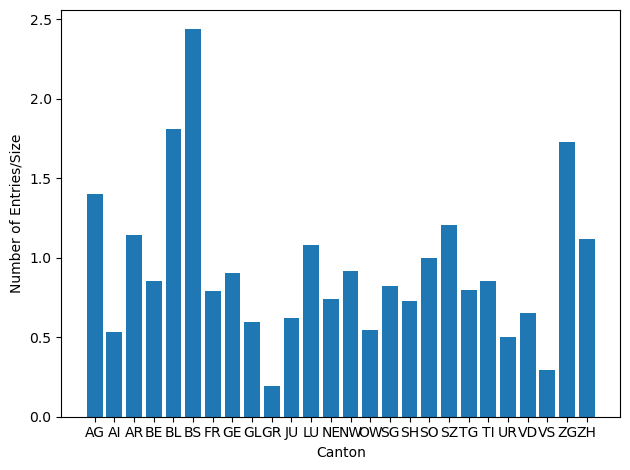

In [130]:

plt.bar(cnts_canton_per_size['Canton'], cnts_canton_per_size['CountPerSize'])
plt.xlabel('Canton')
plt.ylabel('Number of Entries/Size')
plt.tight_layout()

# Show the plot
plt.show()

In [134]:
df['Schadenszentrum, Gemeindegebiet falls nicht bekannt'].unique()

array(['bekannt', 'Gemeindegebiet', nan], dtype=object)